In [6]:
import os
import regex as re
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LassoCV,LogisticRegression,LogisticRegressionCV

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.manifold import MDS, Isomap, TSNE
from numpy.random import multivariate_normal

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from tqdm import tqdm

#from skbayes.mixture_models import VBBMM

import warnings
warnings.filterwarnings('ignore')

In [7]:
dfr = pd.read_csv('output.csv')

In [8]:
desc = dfr.describe()
desc

,RecipeID,ReviewCount,CookTimeMin,PrepTimeMin,yeast,water,white sugar,salt,eggs,butter,...,vanilla very fine,red bean paste,chocolatehazelnut spread,loaf italian,cedar plank,pizza crust bread shell,buitoni pesto basil,brown sugar replacement,splenda granular,treacle
count,12351.000000,12351.000000,12351.000000,12351.000000,178.000000,2419.000000,4430.000000,4238.000000,2799.000000,3838.000000,...,1.0,1.0,1.0,1.00,1.0,1.0,1.000000,1.0,1.0,1.00
mean,16149.829326,121.605457,41.214072,18.422719,1.658240,1.787946,1.283794,0.671219,3.214407,1.242129,...,1.0,1.0,1.0,0.75,0.0,1.0,0.333333,3.0,9.0,0.75
std,5745.770833,377.566715,91.012831,73.217291,0.765255,1.970585,1.028936,0.543370,1.747135,1.419097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7000.000000,0.000000,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000,1.000000,0.125000,...,1.0,1.0,1.0,0.75,0.0,1.0,0.333333,3.0,9.0,0.75
25%,11150.500000,12.000000,30.000000,10.000000,1.000000,0.666667,0.666667,0.250000,2.000000,0.500000,...,1.0,1.0,1.0,0.75,0.0,1.0,0.333333,3.0,9.0,0.75
50%,15564.000000,33.000000,30.000000,15.000000,1.500000,1.000000,1.000000,0.500000,3.000000,0.750000,...,1.0,1.0,1.0,0.75,0.0,1.0,0.333333,3.0,9.0,0.75
75%,20889.500000,98.000000,30.000000,15.000000,2.000000,2.000000,1.750000,1.000000,4.000000,1.500000,...,1.0,1.0,1.0,0.75,0.0,1.0,0.333333,3.0,9.0,0.75
max,27546.000000,11000.000000,7578.000000,7200.000000,4.500000,26.000000,16.000000,9.000000,25.000000,30.000000,...,1.0,1.0,1.0,0.75,0.0,1.0,0.333333,3.0,9.0,0.75


In [9]:
desc.loc['count', 'yeast']

178.0

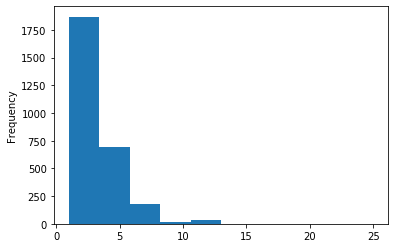

In [10]:
dfr['eggs'].plot.hist()

In [11]:
dfr[dfr['eggs']>20].iloc[0,1]

'12 1/2 cups white sugar. 12 1/2 cups packed brown sugar. 8 1/3 cups butter. 25 eggs. 1/3 cup vanilla extract. 1/4 cup baking soda. 36 1/3 cups all-purpose flour. 1 1/2 tablespoons salt. 9 1/3 pounds semisweet chocolate chips'

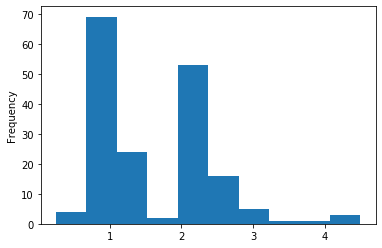

In [12]:
dfr['yeast'].plot.hist()

In [13]:
arr = dfr.iloc[:,6:].fillna(0.0).to_numpy()
arr_bin = arr.copy()
arr_bin[arr_bin>0] = 1

In [14]:
arr_bin

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
def spy(A, figsize=(4, 100), markersize=0.1):
    """Visualizes a sparse matrix."""
    fig = plt.figure(figsize=figsize)
    plt.spy(A, markersize=markersize)
    plt.show()
    
spy(arr)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:12<00:00, 19.22s/it]


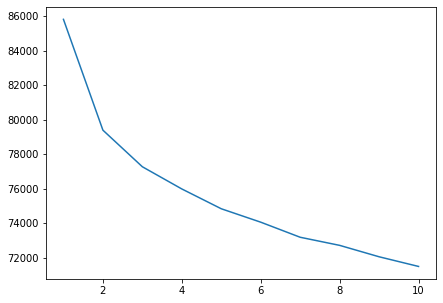

In [50]:

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,11)
  
center = {}
for i in tqdm(K):
    init = KMeans(i)
    model = init.fit(arr_bin)
    #label = model.predict(M)
    center[i] = model.inertia_

lists = sorted(center.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [15]:
def KMEANs_L1(image, k):
    ''''
    pixels: an RGB image (L*W*3)
    k : number of clusters

    output:
        lables for each pixel as array
        centroid of each cluster
    '''
    # convert image into matrix (L*W, 3)
    pixels = image # .reshape(-1, image.shape[2])


    errors = []
    # Randomly initialize centroids with data points;
    c = pixels[np.random.randint(pixels.shape[0], size=(1, k))[0], :].astype(float)

    iterno = 300
    for iter in range(0, iterno):
       # print(iter)
        c_old = c
        # compute the pairewise L1 distnace
        tmpdiff = cdist(pixels, c, 'jaccard')
        # assign the point to a cluster
        labels = np.argmin(tmpdiff, axis=1)

        # parts from code below taken from demo code
        # Update data assignment matrix;
        m = pixels.shape[0]
        P = sp.sparse.csc_matrix((np.ones(m), (np.arange(0, m, 1), labels)), shape=(m, k)).toarray()

        centroids = []
        for i in range(P.shape[1]):
            # compute the median of poiints as new centroid
            centroids.append(np.median(pixels[P[:, i] == 1], axis=0))

        # create new centoid materix
        c = np.vstack(centroids)

        # compute how much a centroid changes
        e = np.linalg.norm(c - c_old, ord='fro')
        errors.append(e)
        print(e)
        if e <= 1e-6:
            break

    print('iterations to converge:- ', iter)


    plt.figure(0)
    plt.plot(range(len(errors)), errors)
    plt.xlabel('iteration')
    plt.ylabel('error')
    plt.title('convergence')

    plt.show()


    return labels+1, c

6.855654600401044
1.7320508075688772
1.0
0.0
iterations to converge:-  3


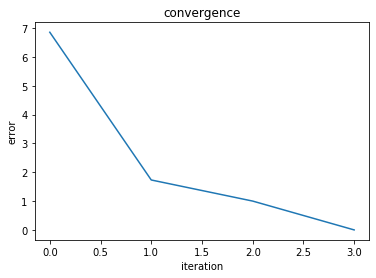

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([2448, 4522,  864,  599, 1965,  589, 1364], dtype=int64))

In [16]:
c_labels,_ =  KMEANs_L1(arr_bin, 7)
np.unique(c_labels,return_counts=True)

In [ ]:
kmeanModel = KMeans(n_clusters=70)
kmeanModel.fit(arr_bin)
c_labels = kmeanModel.predict(arr_bin)
np.unique(c_labels,return_counts=True)

In [ ]:
IF = IsolationForest(random_state=0,contamination=0.01)
c_labels = IF.fit_predict(arr)
np.unique(c_labels,return_counts=True)

In [ ]:
n_comoponents = 3
bmm = VBBMM(n_components = n_comoponents, c = 0.6, d = 0.4, compute_score = True)

# fit model
bmm = bmm.fit(digits)

In [17]:
 from sklearn.mixture import GaussianMixture
    
gmm = GaussianMixture(n_components=7, random_state=0).fit(arr)

KeyboardInterrupt: 

In [ ]:
gm.means_

In [53]:
from sklearn.manifold import  TSNE
embedding = TSNE(n_components=2, n_jobs=-1)
X_transformed = embedding.fit_transform(arr[:,importance > 0])
X_transformed.shape

(12351, 2)

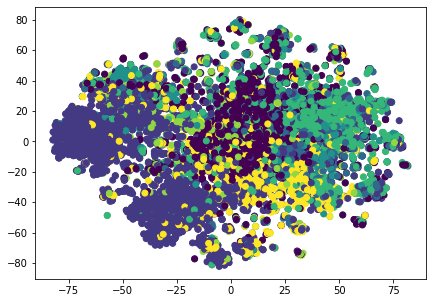

In [56]:
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=c_labels)

(array([2448., 4522.,  864.,  599., 1965.,  589., 1364.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

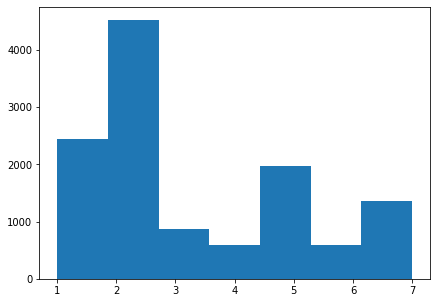

In [60]:
plt.hist(c_labels, bins=7)

In [ ]:
#from kmodes.kmodes import KModes
#kmode = KModes(n_clusters=30, init = "random", verbose=1) #init = "random", n_init = 5, verbose=1)
#clusters = kmode.fit_predict(arr)
#clusters

In [18]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(arr_bin, c_labels, test_size=0.2, shuffle = True, random_state = 8)

In [63]:
search=LogisticRegressionCV(cv=3, random_state=0,penalty='l1',class_weight='balanced', solver='saga', verbose=3)
#search=LogisticRegression(penalty='l1', solver='saga')
#search=LogisticRegression(penalty='l1',class_weight='balanced', solver='saga')

search.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')

In [155]:
ids = np.random.randint(0,X_train.shape[0],1000)

In [157]:
LassoCV_model = LassoCV(cv=5)
LassoCV_model.fit(X_train[ids,:],y_train[ids])
alphas, coefs, _ = LassoCV_model.path(X_train[ids,:],y_train[ids]) # to show path of coeffs.

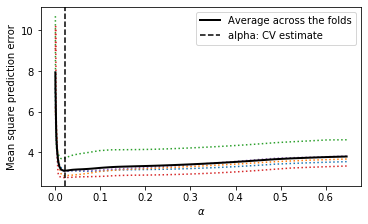

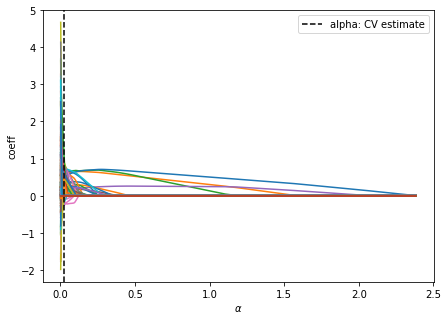

In [158]:
## plot 1
plt.figure(figsize=(5, 3), constrained_layout=True)
plt.plot(LassoCV_model.alphas_, LassoCV_model.mse_path_, ':')
plt.plot(LassoCV_model.alphas_, LassoCV_model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(LassoCV_model.alpha_, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square prediction error')
plt.show()


### plot 2
fig, ax = plt.subplots()
ax.plot(alphas, coefs.T)  # Set log scale  ...
plt.axvline(LassoCV_model.alpha_, linestyle='--', color='k',
            label='alpha: CV estimate')
plt.xlabel(r'$\alpha$')
plt.ylabel('coeff')
plt.legend()
plt.show()


In [167]:
LassoCV_model.alpha_

0.021166206886026523

In [160]:
features

Index(['yeast', 'water', 'white sugar', 'salt', 'eggs', 'butter',
       'allpurpose flour', 'baking powder', 'poppy seeds',
       'butter flavored extract',
       ...
       'vanilla very fine', 'red bean paste', 'chocolatehazelnut spread',
       'loaf italian', 'cedar plank', 'pizza crust bread shell',
       'buitoni pesto basil', 'brown sugar replacement', 'splenda granular',
       'treacle'],
      dtype='object', length=3754)

In [165]:
coefs.T.shape

(100, 3754)

In [173]:
LassoCV_model.coef_

array([0.03698771, 0.32233048, 0.31810714, ..., 0.        , 0.        ,
       0.        ])

In [171]:
features = dfr.iloc[:,6:].columns
#coefficients =search.coef_[0]
coefficients = LassoCV_model.coef_
importance = np.abs(coefficients)
imp_features = np.array(features)[importance > 0]
len(imp_features)


75

In [172]:
print('Examples of important words:- ')
print(imp_features[:10])
print()
print('Examples of NON important words:- ')
print(np.array(features)[importance == 0][:10])

Examples of important words:- 
['yeast' 'water' 'white sugar' 'salt' 'butter' 'allpurpose flour'
 'baking powder' 'vegetable oil' 'milk' 'orange juice']

Examples of NON important words:- 
['eggs' 'poppy seeds' 'butter flavored extract' 'vanilla extract'
 'almond extract' 'confectioners sugar' 'applesauce' 'raisins' 'cream'
 'nutmeg']


In [177]:
1-(75/3754)

0.9800213106020245

In [174]:
LassoCV_model = search.predict(X_test)
LassoCV_model = search.predict(X_train)

print("train_Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
#print("train_Precision:",metrics.precision_score(y_train, y_pred_train))
#print("train_Recall:",metrics.recall_score(y_train, y_pred_train))

print()
print("test_Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
#print("test_Precision:",metrics.precision_score(y_test, y_pred_test))
#print("test_Recall:",metrics.recall_score(y_test, y_pred_test))

train_Accuracy: 0.8418016194331984

test_Accuracy: 0.8130311614730878


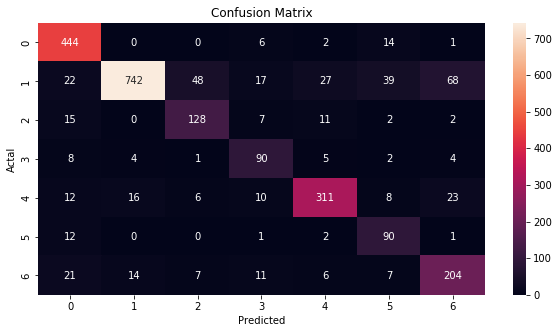

In [175]:

cm_df = pd.DataFrame(cf_matrix,
                     index = range(7), 
                     columns = range(7))
#Plotting the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='')
plt.title('Confusion Matrix')
plt.ylabel('Actal')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components             
    '''
    num_components = len(pca.explained_variance_ratio_) ## num of Principal components (PCs)
    ind = np.arange(num_components) # create an index list
    vals = pca.explained_variance_ratio_ # show the % of vaition explained by each PC
    cumvals = np.cumsum(vals) # cummulative sum to see the % of vaiation explained by PC1+PC2+PC3+....+PCn

    ## plotting
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    ax.bar(ind, vals) # create bar plot to show %var explained by each PC
    ax.plot(ind, cumvals) # create line plot to show % increase in exp variance for every added PC
 
    ## set plot lables
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
    return {i:v for i,v in zip(ind,cumvals) if v<=99}
    
# Apply PCA to the data.
pca = PCA(n_components=1000, random_state=8)
X_pca = pca.fit_transform(arr) ## fit it to the data to generate the PCs

plot = scree_plot(pca) # call the function above


In [ ]:
pca = PCA(500, random_state=45)
X_pca = pca.fit_transform(arr[:,importance > 0])

In [ ]:
embedding = TSNE(n_components=2, n_jobs=-1)
X_transformed = embedding.fit_transform(X_pca)
X_transformed.shape

In [ ]:
IF = IsolationForest(random_state=0,contamination=0.01)
EE = EllipticEnvelope(support_fraction=1, contamination=0.01)
#SVM = OneClassSVM(nu=0.2, gamma='auto')

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=c_labels)

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=labels)

In [ ]:
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=c_labels)

In [ ]:
arr[:,importance > 0].shape

In [ ]:
#pipeline = Pipeline([('model',LogisticRegression(cv=5, random_state=0,penalty='l1',class_weight='balanced',))])

#search = GridSearchCV(pipeline,
#                      {'model__alpha':np.arange(0.0,1,0.2)},
#                      cv = 5, scoring="neg_mean_squared_error",verbose=3
#                      )

## combiner

In [72]:
columns_keep = ['RecipeID','CookTimeMin','PrepTimeMin']+list(imp_features)
columns_keep

['RecipeID',
 'CookTimeMin',
 'PrepTimeMin',
 'yeast',
 'water',
 'white sugar',
 'salt',
 'eggs',
 'butter',
 'allpurpose flour',
 'baking powder',
 'poppy seeds',
 'vegetable oil',
 'milk',
 'vanilla extract',
 'almond extract',
 'orange juice',
 'confectioners sugar',
 'raisins',
 'cinnamon',
 'baking soda',
 'cream',
 'nutmeg',
 'packed brown sugar',
 'rolled oats',
 'apple',
 'walnuts',
 'buttermilk',
 'egg',
 'shortening',
 'egg yolks',
 'lemon extract',
 'bread flour',
 'wheat flour',
 'cottage cheese',
 'margarine',
 'bananas',
 'chocolate chips',
 'green bell pepper',
 'onion',
 'garlic powder',
 'kernel',
 'pimento',
 'jalapeno peppers',
 'real maple syrup',
 'thick slices bread',
 'light brown sugar',
 'cocoa powder',
 'semisweet chocolate chips',
 'molasses',
 'brown sugar',
 'plain yogurt',
 'light corn syrup',
 'cloves',
 'Unnamed: 66',
 'honey',
 'quick cooking oats',
 'carrots',
 'pineapple',
 'cider vinegar',
 'milk powder',
 'zucchini',
 'cream cheese',
 'coconut',
 '

In [75]:
dfr[columns_keep].fillna(0.0)

,RecipeID,CookTimeMin,PrepTimeMin,yeast,water,white sugar,salt,eggs,butter,allpurpose flour,...,orangefleshed sweet potatoes,arrowroot,garlic herb flour tortillas,reducedfat mayonnaise,romaine,potato hamburger buns,miniature croissants,costeno amarillo chile peppers,amaretto,jiggers creme de cacao liqueur
0,7000,15,25,2.0,0.75,0.500000,1.0,2.0,0.25,4.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7001,60,15,0.0,0.00,2.250000,1.5,3.0,0.00,3.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7003,80,10,0.0,0.00,2.000000,0.0,3.0,0.00,3.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7006,60,15,0.0,0.00,0.000000,1.0,2.0,0.00,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7007,60,10,0.0,0.00,0.000000,0.5,0.0,0.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12346,27456,30,30,0.0,0.00,0.000000,0.0,0.0,3.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,27478,60,20,0.0,0.25,0.500000,0.0,4.0,0.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,27491,25,20,0.0,0.00,0.666667,0.5,0.0,0.25,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349,27511,50,25,0.0,2.25,1.000000,0.0,4.0,0.50,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
tfidf =  pd.read_csv('tfid.csv')

In [77]:
tfidf.rename(columns={'Unnamed: 0':'RecipeID'}, inplace=True)

In [78]:
tfidf

,RecipeID,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,7000,0.445450,0.039753,0.176683,-0.024751,-0.046635,-0.017300,-0.061386,0.011616,0.077476,...,-0.008570,0.001447,-0.005216,-0.010650,-0.005907,-0.002416,0.012195,0.009854,0.018965,-0.009217
1,7001,0.454786,0.145116,-0.001796,-0.003934,-0.093325,-0.003247,-0.042735,0.020882,0.153026,...,-0.021975,0.002316,-0.001716,-0.004706,0.001501,0.001733,-0.023473,0.003462,0.001484,-0.015341
2,7003,0.558716,0.100326,0.033226,0.057100,-0.082365,-0.035163,-0.031259,-0.008966,0.265989,...,-0.000873,-0.002042,0.003209,-0.001610,-0.008267,-0.006201,0.004972,0.005778,-0.001693,-0.009690
3,7009,0.394057,0.010781,0.073303,-0.005132,-0.072696,-0.026027,-0.067324,0.032420,0.159057,...,-0.004154,-0.012689,0.015627,-0.033992,-0.016408,0.001807,-0.020070,0.003267,-0.001047,-0.000623
4,7013,0.452307,0.117580,0.117197,0.003200,-0.028275,-0.028645,-0.052948,0.106276,0.147486,...,0.002563,-0.005109,-0.009594,-0.010294,0.001618,0.002850,0.005520,0.009933,-0.011624,0.010318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421,27341,0.396773,0.029731,0.029643,0.010079,-0.099871,-0.025037,-0.015003,0.023768,0.130496,...,-0.009678,-0.009692,-0.006500,-0.022130,-0.001544,0.017838,-0.001887,0.021662,0.011286,-0.008527
6422,27342,0.336087,0.038075,0.091938,0.015498,-0.036204,-0.011666,-0.025769,0.012341,0.062001,...,-0.003788,-0.036406,-0.060060,-0.084472,0.021829,-0.039671,0.049578,-0.055983,-0.028437,0.035579
6423,27478,0.295165,0.091187,0.057105,0.148663,-0.006376,-0.005802,-0.039480,0.119623,-0.059186,...,-0.015835,-0.002446,0.010000,0.007028,-0.002324,-0.012374,0.011059,-0.008114,-0.002989,0.002208
6424,27491,0.559162,0.495563,-0.248458,-0.027785,0.001135,0.013230,-0.030598,-0.064046,0.088747,...,0.010288,-0.010184,-0.004632,0.007566,-0.011008,-0.003474,0.001199,-0.001124,0.005380,0.000973


In [79]:
df_all = dfr[columns_keep].fillna(0.0).merge(tfidf, on='RecipeID')

In [80]:
df_all.set_index('RecipeID', inplace=True)

In [81]:
df_all

,CookTimeMin,PrepTimeMin,yeast,water,white sugar,salt,eggs,butter,allpurpose flour,baking powder,...,490,491,492,493,494,495,496,497,498,499
RecipeID,,,,,,,,,,,,,,,,,,,,,
7000,15,25,2.0,0.75,0.500000,1.00,2.0,0.25,4.000000,0.00,...,-0.008570,0.001447,-0.005216,-0.010650,-0.005907,-0.002416,0.012195,0.009854,0.018965,-0.009217
7001,60,15,0.0,0.00,2.250000,1.50,3.0,0.00,3.000000,1.50,...,-0.021975,0.002316,-0.001716,-0.004706,0.001501,0.001733,-0.023473,0.003462,0.001484,-0.015341
7003,80,10,0.0,0.00,2.000000,0.00,3.0,0.00,3.000000,0.25,...,-0.000873,-0.002042,0.003209,-0.001610,-0.008267,-0.006201,0.004972,0.005778,-0.001693,-0.009690
7009,35,20,3.0,4.00,4.000000,4.00,0.0,0.00,0.000000,0.00,...,-0.004154,-0.012689,0.015627,-0.033992,-0.016408,0.001807,-0.020070,0.003267,-0.001047,-0.000623
7013,25,10,0.0,1.00,1.250000,0.25,0.0,0.00,2.250000,1.00,...,0.002563,-0.005109,-0.009594,-0.010294,0.001618,0.002850,0.005520,0.009933,-0.011624,0.010318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27341,60,20,0.0,0.00,1.875000,0.75,3.0,0.50,2.666667,1.00,...,-0.009678,-0.009692,-0.006500,-0.022130,-0.001544,0.017838,-0.001887,0.021662,0.011286,-0.008527
27342,8,120,4.5,0.00,0.500000,2.00,2.0,2.00,8.000000,0.00,...,-0.003788,-0.036406,-0.060060,-0.084472,0.021829,-0.039671,0.049578,-0.055983,-0.028437,0.035579
27478,60,20,0.0,0.25,0.500000,0.00,4.0,0.00,1.000000,0.00,...,-0.015835,-0.002446,0.010000,0.007028,-0.002324,-0.012374,0.011059,-0.008114,-0.002989,0.002208


In [82]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_all), columns=df_all.columns, index=df_all.index)
df_scaled

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,CookTimeMin,PrepTimeMin,yeast,water,white sugar,salt,eggs,butter,allpurpose flour,baking powder,...,490,491,492,493,494,495,496,497,498,499
RecipeID,,,,,,,,,,,,,,,,,,,,,
7000,-0.401255,0.400852,14.428845,0.400704,0.115440,1.667163,0.882000,-0.147545,3.270162,-0.256270,...,-0.600272,0.101677,-0.373271,-0.759645,-0.423278,-0.170352,0.871682,0.706952,1.373425,-0.667715
7001,0.215685,-0.116060,-0.073346,-0.297233,2.344066,2.752207,1.547930,-0.416377,2.329055,2.617852,...,-1.547293,0.163242,-0.124623,-0.337125,0.105357,0.126144,-1.689710,0.247036,0.110616,-1.110435
7003,0.489880,-0.374515,-0.073346,-0.297233,2.025691,-0.502926,1.547930,-0.416377,2.329055,0.222750,...,-0.056540,-0.145337,0.225183,-0.117014,-0.591668,-0.440831,0.352984,0.413696,-0.118888,-0.701884
7009,-0.127060,0.142396,21.679941,3.425100,4.572692,8.177430,-0.449860,-0.416377,-0.494267,-0.256270,...,-0.288299,-0.899173,1.107224,-2.419018,-1.172565,0.131466,-1.445326,0.232941,-0.072227,-0.046419
7013,-0.264157,-0.374515,-0.073346,0.633350,1.070565,0.039596,-0.449860,-0.416377,1.623224,1.659811,...,0.186211,-0.362476,-0.684197,-0.734369,0.113677,0.205978,0.392332,0.712700,-0.836261,0.744547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27341,0.215685,0.142396,-0.073346,-0.297233,1.866503,1.124640,1.547930,0.121287,2.015352,1.659811,...,-0.678517,-0.686941,-0.464407,-1.575803,-0.111906,1.277060,-0.139574,1.556698,0.818712,-0.617799
27342,-0.497224,5.311510,32.556585,-0.297233,0.115440,3.837252,0.882000,1.734277,7.034590,-0.256270,...,-0.262408,-2.578337,-4.268724,-6.007630,1.555868,-2.832658,3.556247,-4.030812,-2.050787,2.570685
27478,0.215685,0.142396,-0.073346,-0.064588,0.115440,-0.502926,2.213861,-0.416377,0.446840,-0.256270,...,-1.113559,-0.173919,0.707500,0.497029,-0.167558,-0.881946,0.790106,-0.586026,-0.212478,0.158269


In [92]:
embedding = TSNE(n_components=2, n_jobs=-1)
X_transformed = embedding.fit_transform(df_all[2:])
X_transformed.shape

(6424, 2)

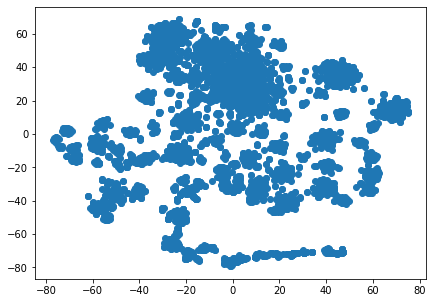

In [103]:
plt.scatter(X_transformed[:,0],X_transformed[:,1])

In [200]:
X_trans2 = np.vstack([X_transformed,X_transformed[-50:]*1.5])
X_trans2

array([[-26.361862 , -68.29545  ],
       [-23.401619 ,  17.153528 ],
       [ 45.111095 ,  11.932054 ],
       ...,
       [-62.86511  , -48.39824  ],
       [-10.651608 ,  -6.6097317],
       [-66.99697  , -25.930462 ]], dtype=float32)

In [201]:
c = ['blue']*X_transformed.shape[0] + ['red']*50

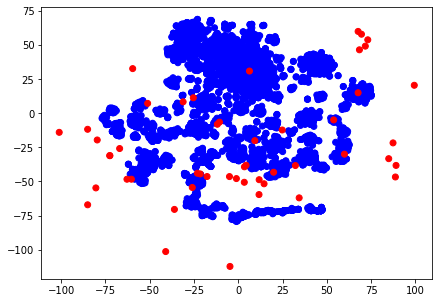

In [202]:
plt.scatter(X_trans2[:,0],X_trans2[:,1],c=c)

In [218]:
IF = IsolationForest(random_state=0,contamination=0.1)
f_labels = IF.fit_predict(df_all.iloc[:,2:])
np.unique(f_labels,return_counts=True)
#plt.scatter(X_trans2[:,0],X_trans2[:,1], c=f_labels)
#plt.title("IsolationForrest contamination=0.01")

(array([-1,  1]), array([ 643, 5783], dtype=int64))

Text(0.5, 1.0, 'IsolationForrest contamination=0.05')

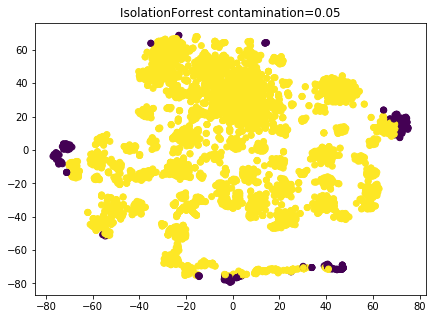

In [140]:
IF = IsolationForest(random_state=0,contamination=0.05)
f_labels = IF.fit_predict(X_transformed)
np.unique(f_labels,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels)
plt.title("IsolationForrest contamination=0.05")

Text(0.5, 1.0, 'IsolationForrest contamination=0.1')

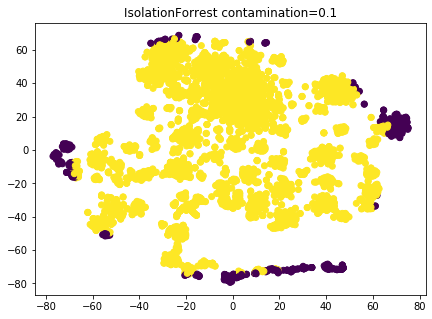

In [141]:
IF = IsolationForest(random_state=0,contamination=0.1)
f_labels = IF.fit_predict(X_transformed)
np.unique(f_labels,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels)
plt.title("IsolationForrest contamination=0.1")

Text(0.5, 1.0, 'IsolationForrest contamination=0.3')

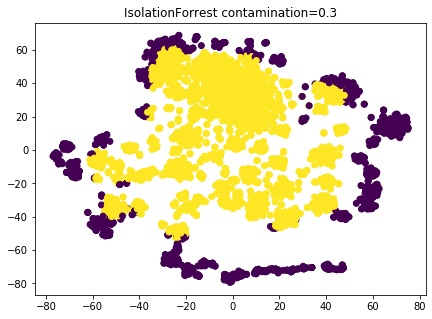

In [142]:
IF = IsolationForest(random_state=0,contamination=0.3)
f_labels = IF.fit_predict(X_transformed)
np.unique(f_labels,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels)
plt.title("IsolationForrest contamination=0.3")

Text(0.5, 1.0, 'IsolationForrest contamination=0.5')

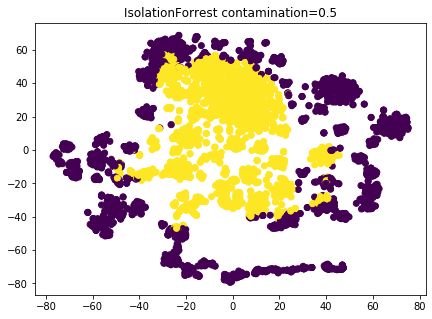

In [143]:
IF = IsolationForest(random_state=0,contamination=0.5)
f_labels = IF.fit_predict(X_transformed)
np.unique(f_labels,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels)
plt.title("IsolationForrest contamination=0.5")

Text(0.5, 1.0, 'EllipticEnvelope contamination=0.01')

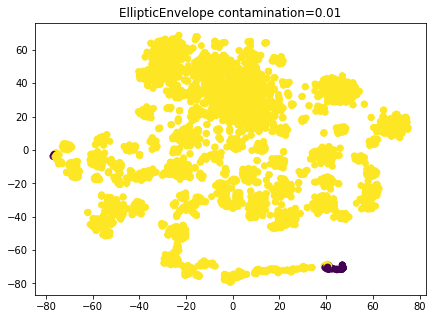

In [144]:
EE = EllipticEnvelope(support_fraction=1, contamination=0.01)
f_labels = EE.fit_predict(X_transformed)
np.unique(f_labels,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels)
plt.title("EllipticEnvelope contamination=0.01")

Text(0.5, 1.0, 'EllipticEnvelope contamination=0.05')

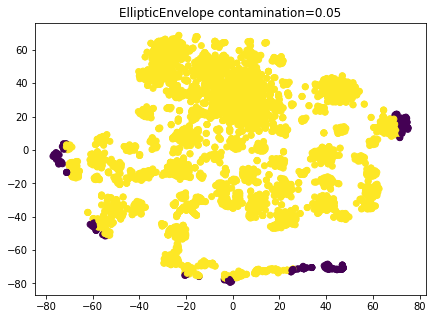

In [145]:
EE = EllipticEnvelope(support_fraction=1, contamination=0.05)
f_labels = EE.fit_predict(X_transformed)
np.unique(f_labels,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels)
plt.title("EllipticEnvelope contamination=0.05")

Text(0.5, 1.0, 'EllipticEnvelope contamination=0.1')

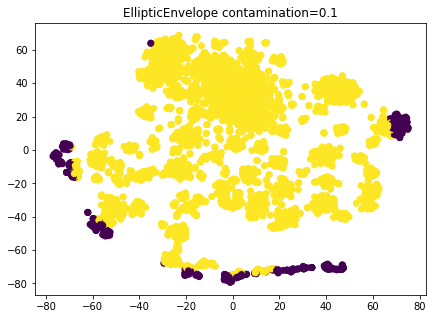

In [146]:
EE = EllipticEnvelope(support_fraction=1, contamination=0.1)
f_labels = EE.fit_predict(X_transformed)
np.unique(f_labels,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels)
plt.title("EllipticEnvelope contamination=0.1")

Text(0.5, 1.0, 'EllipticEnvelope contamination=0.3')

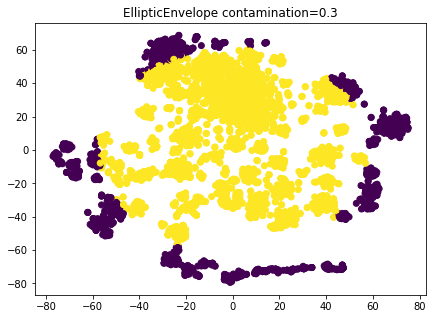

In [147]:
EE = EllipticEnvelope(support_fraction=1, contamination=0.3)
f_labels = EE.fit_predict(X_transformed)
np.unique(f_labels,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels)
plt.title("EllipticEnvelope contamination=0.3")

Text(0.5, 1.0, 'EllipticEnvelope contamination=0.5')

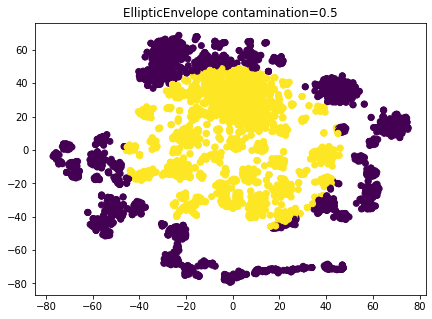

In [148]:
EE = EllipticEnvelope(support_fraction=2, contamination=0.5)
f_labels = EE.fit_predict(X_transformed)
np.unique(f_labels,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels)
plt.title("EllipticEnvelope contamination=0.5")

Text(0.5, 1.0, 'DBSCAN eps=0.1')

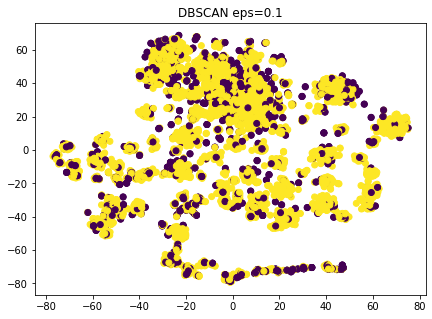

In [149]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.1, min_samples=2).fit(X_transformed)
clustering.labels_

f_labels2 = clustering.labels_.copy()
cc = np.unique(f_labels2, return_counts=True)
for i,c in enumerate(cc[1]):    
    if c<100:
        f_labels2[clustering.labels_==cc[0][i]] = -1
    else:
        f_labels2[clustering.labels_==cc[0][i]] = 1
    
np.unique(f_labels2,return_counts=True)

plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels2)#, edgecolors='white')
plt.title("DBSCAN eps=0.1")

Text(0.5, 1.0, 'DBSCAN eps=0.5')

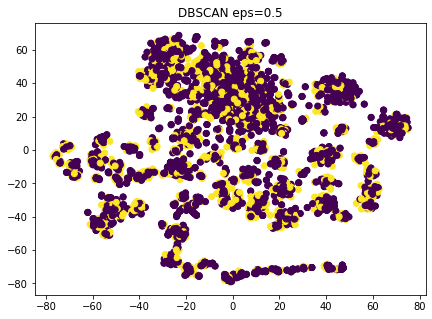

In [150]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=2).fit(X_transformed)
clustering.labels_

f_labels2 = clustering.labels_.copy()
cc = np.unique(f_labels2, return_counts=True)
for i,c in enumerate(cc[1]):    
    if c<100:
        f_labels2[clustering.labels_==cc[0][i]] = -1
    else:
        f_labels2[clustering.labels_==cc[0][i]] = 1
    
np.unique(f_labels2,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels2)#, edgecolors='white')
plt.title("DBSCAN eps=0.5")

Text(0.5, 1.0, 'DBSCAN eps=1')

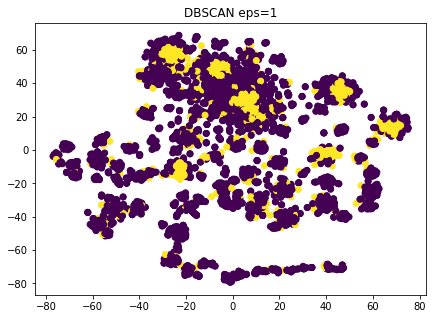

In [151]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=2).fit(X_transformed)
clustering.labels_

f_labels2 = clustering.labels_.copy()
cc = np.unique(f_labels2, return_counts=True)
for i,c in enumerate(cc[1]):    
    if c<100:
        f_labels2[clustering.labels_==cc[0][i]] = -1
    else:
        f_labels2[clustering.labels_==cc[0][i]] = 1
    
np.unique(f_labels2,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels2)#, edgecolors='white')
plt.title("DBSCAN eps=1")

Text(0.5, 1.0, 'DBSCAN eps=3.5')

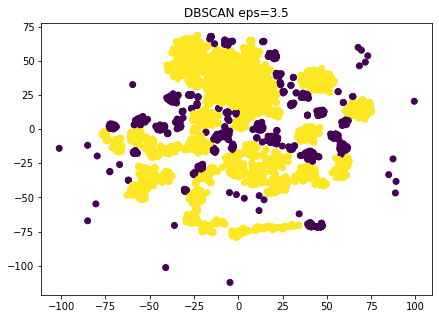

In [203]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3.5, min_samples=2).fit(X_trans2)
clustering.labels_

f_labels2 = clustering.labels_.copy()
cc = np.unique(f_labels2, return_counts=True)
for i,c in enumerate(cc[1]):    
    if c<100:
        f_labels2[clustering.labels_==cc[0][i]] = -1
    else:
        f_labels2[clustering.labels_==cc[0][i]] = 1
    
np.unique(f_labels2,return_counts=True)
plt.scatter(X_trans2[:,0],X_trans2[:,1], c=f_labels2)#, edgecolors='white')
plt.title("DBSCAN eps=3.5")

In [204]:
39/50

0.78

Text(0.5, 1.0, 'DBSCAN eps=5')

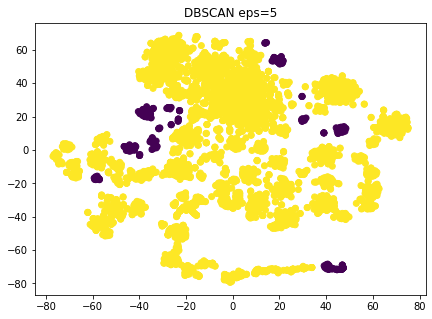

In [153]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=5, min_samples=2).fit(X_transformed)
clustering.labels_

f_labels2 = clustering.labels_.copy()
cc = np.unique(f_labels2, return_counts=True)
for i,c in enumerate(cc[1]):    
    if c<100:
        f_labels2[clustering.labels_==cc[0][i]] = -1
    else:
        f_labels2[clustering.labels_==cc[0][i]] = 1
    
np.unique(f_labels2,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels2)#, edgecolors='white')
plt.title("DBSCAN eps=5")

In [98]:
#IF = IsolationForest(random_state=0)#,contamination=0.01)
#EE = EllipticEnvelope(support_fraction=1, contamination=0.01)
#SVM = OneClassSVM(nu=0.2, gamma='auto')

In [104]:
IF = IsolationForest(random_state=0)
f_labels = IF.fit_predict(X_transformed)
np.unique(f_labels,return_counts=True)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels)

(array([-1,  1]), array([2497, 3927], dtype=int64))

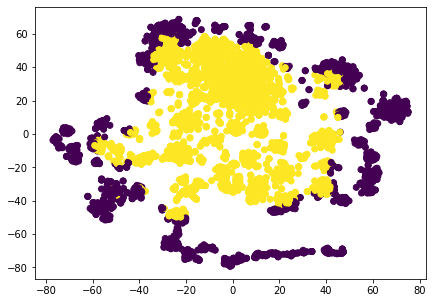

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=4, min_samples=2).fit(X_transformed)
clustering.labels_

f_labels2 = clustering.labels_.copy()
cc = np.unique(f_labels2, return_counts=True)
for i,c in enumerate(cc[1]):    
    if c<100:
        f_labels2[clustering.labels_==cc[0][i]] = -1
    else:
        f_labels2[clustering.labels_==cc[0][i]] = 1
    
np.unique(f_labels2,return_counts=True)

In [ ]:
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=f_labels2, alpha=0.9)#, edgecolors='white')

In [220]:
cc = dfr[dfr['RecipeID'].isin(df_all.iloc[f_labels==-1,:].index)]

In [221]:
for i in range(65):
    print(cc.iloc[i,5])
    print('Ingredients:')
    print(cc.iloc[i,1])
    print()

lemon poppy seed loaf recipe
Ingredients:
3 cups all-purpose flour. 1 1/2 teaspoons baking soda. 3/4 teaspoon salt. 3/4 cup butter, softened. 2 cups white sugar. 3 eggs. 1/2 cup lemon juice. 3/4 cup plain yogurt. 3 tablespoons lemon zest. 1/2 cup poppy seeds

amaretto cheesecake i recipe
Ingredients:
1 cup graham cracker crumbs. 3 tablespoons white sugar. 3 tablespoons butter. 2 packages cream cheese. 1 1/4 cups white sugar. 3 tablespoons cornstarch. 1 container sour cream. 1 1/2 teaspoons vanilla extract. 5 tablespoons amaretto liqueur. 1/2 teaspoon salt. 4 eggs

cone cupcakes recipe
Ingredients:
1/2 cup butter, softened. 1 cup white sugar. 2 eggs. 1 teaspoon vanilla extract. 1 3/4 cups all-purpose flour. 2 1/2 teaspoons baking powder. 1/4 teaspoon salt. 2/3 cup milk. 24 flat bottomed ice cream cones

german christmas gingerbread recipe
Ingredients:
1 cup butter, softened. 2 cups packed brown sugar. 3 eggs. 2/3 cup honey. 1/4 cup orange liqueur. 1 cup sour cream. 1/2 cup orange juice.